In [3]:
import numpy as np
from Configuration import NetworkParams, Experiment
from iteration_5_nmda.network_with_nmda import wang_model_with_extra_variables
from loguru import logger

In [4]:
logger.remove()
logger.add(sys.stderr, level="INFO")

1

# Test if step input produces .... what ?

2025-11-04 10:41:43.594 | INFO     | Configuration:__init__:111 - Computed tau membrane = 25. ms, nu threshold = 8.33333333 Hz
2025-11-04 10:41:43.598 | INFO     | Configuration:__init__:203 - Effective Reversal -64.76923077 mV
2025-11-04 10:41:43.600 | INFO     | Configuration:__init__:208 - Effective Reversal with included Poisson Rate -64.49883182 mV


[[  0   1   4   9  10  12  16  19  22  23  26  28  35  39  40  41  45  47
   50  54  55  57  59  61  62  73  74  75  76  79  82  84  87  89 100 102
  103 106 108 109 110 111 112 113 118 121 123 125 129 131 137 141 142 145
  147 149 151 156 158 159 160 163 165 167 170 172 173 178 179 181 189 196
  197 199 200 201 203 205 206 207 209 217 221 225 226 231 233 236]
 [  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1]]


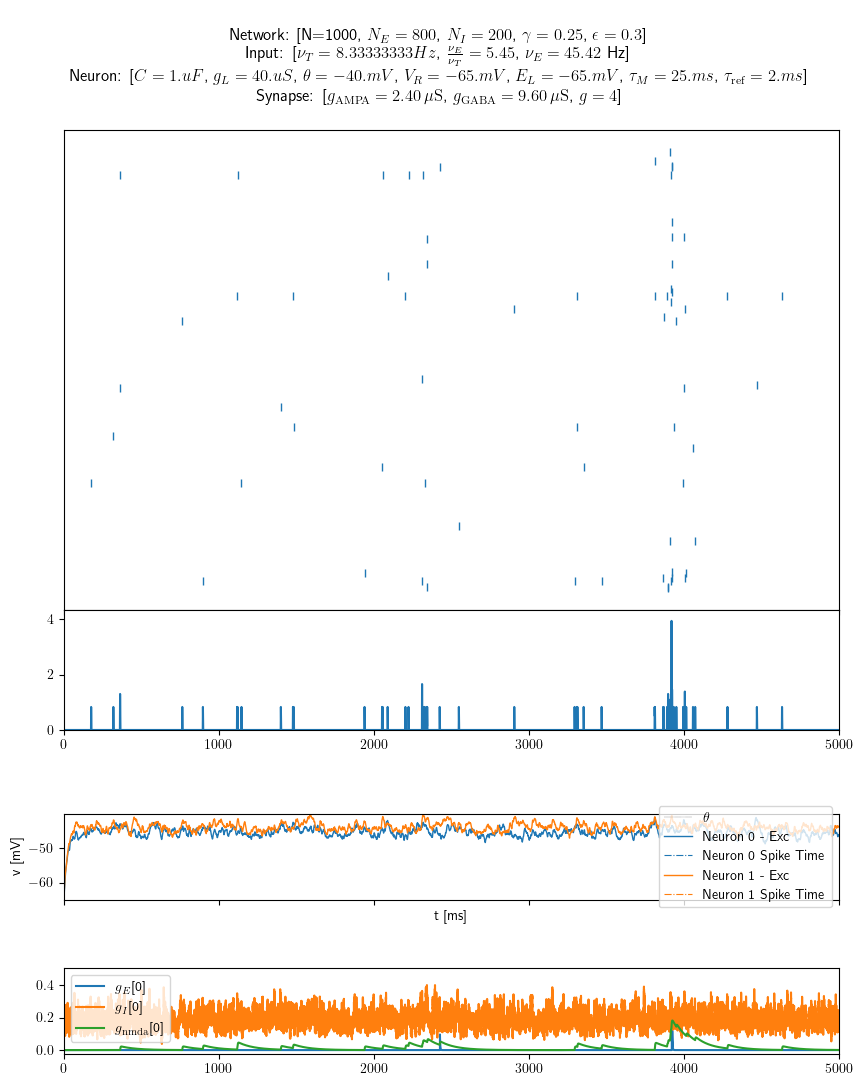

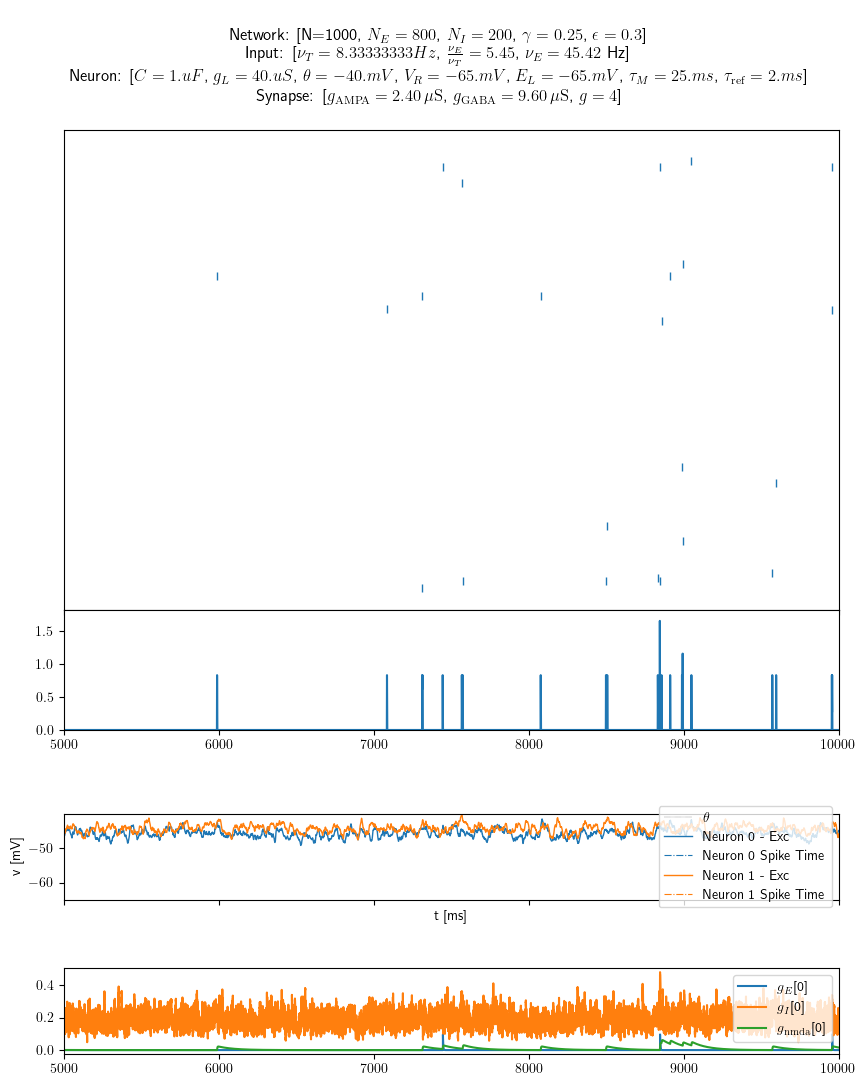

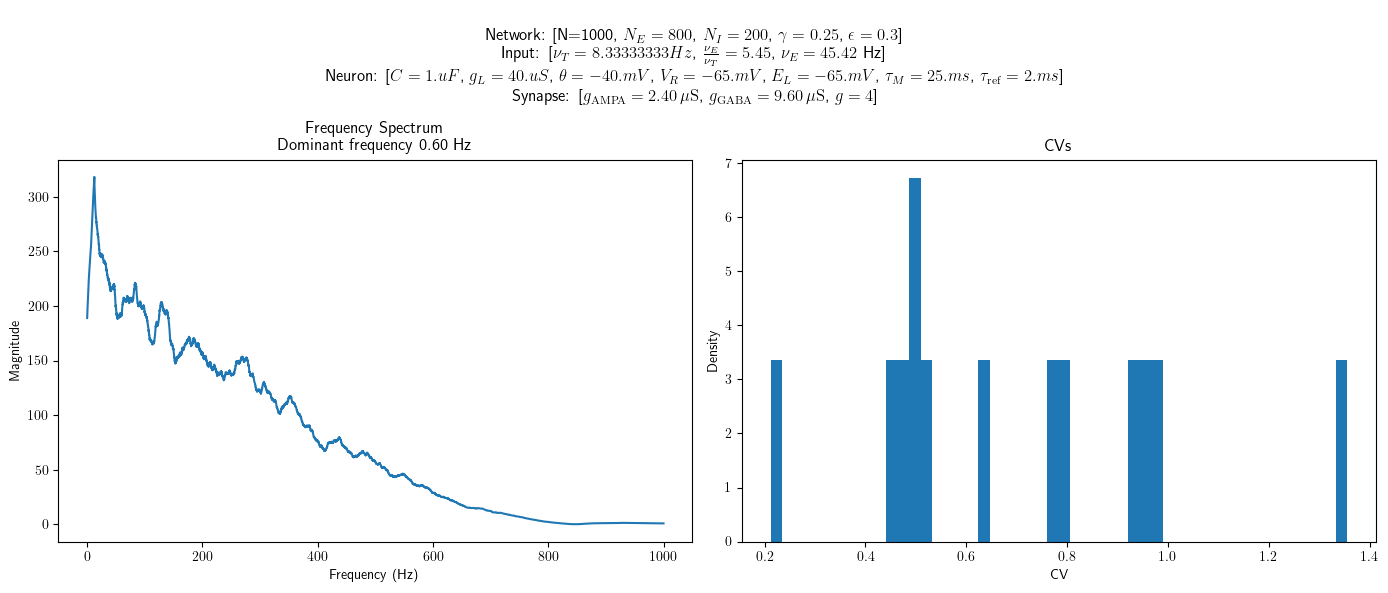

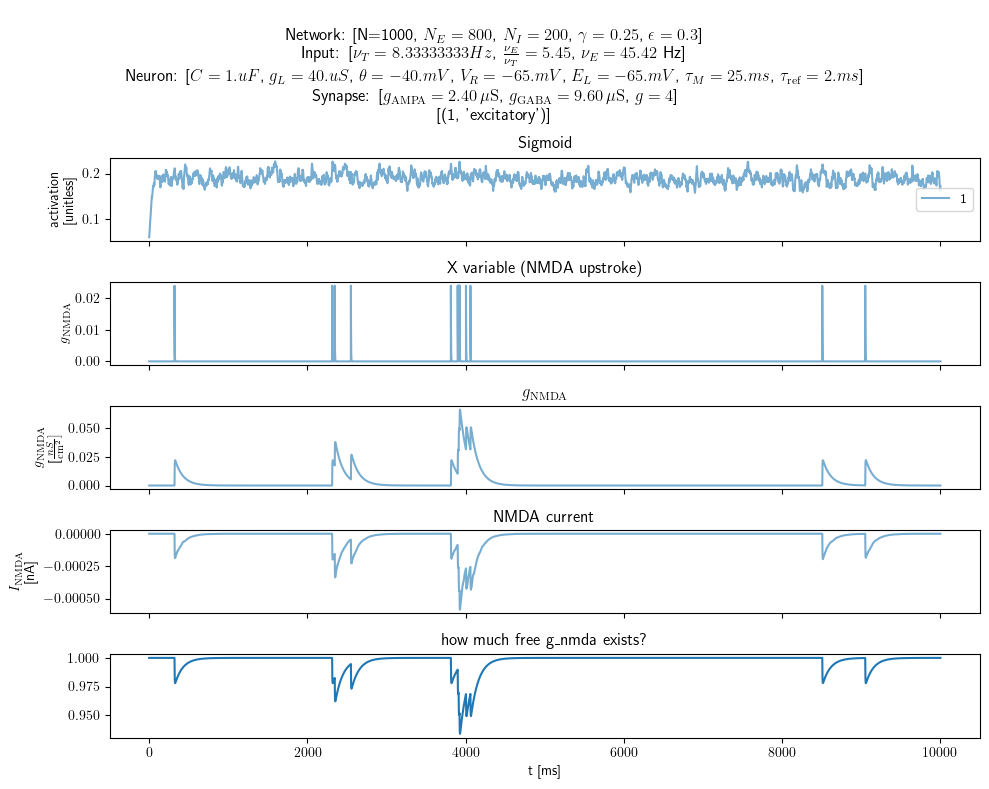

(<PopulationRateMonitor, recording neurongroup_1>,
 <SpikeMonitor, recording from 'spikemonitor_1'>,
 <StateMonitor, recording ['v'] from 'neurongroup_1'>,
 <StateMonitor, recording ['g_e', 'g_i', 'g_nmda'] from 'neurongroup_1_subgroup_2'>)

In [5]:

from iteration_6_step_external_input.network_with_step_inactivation_not_working import sim_and_plot
np.random.seed(0)

new_config = {
    "N": 1000,
    "sim_time": 10_000,
    "t_range": [[0, 5000], [5000, 10000]],

    NetworkParams.KEY_NU_E_OVER_NU_THR:5.45,

    NetworkParams.KEY_EPSILON: 0.3,
    "g": 4,
    "g_ampa": 2.4e-06,
    "g_gaba": 2.4e-06,

    "record_N": 10,
    "hidden_variables_to_record": ["sigmoid_v", "x", "g_nmda", "I_nmda", "one_minus_g_nmda"],
    "model": wang_model_with_extra_variables
}

object_under_test = Experiment(new_config)

sim_and_plot(object_under_test)

It would appear that for neuron 1, the external input does not get stopped after 1 second.
Lets test this to make sure!